In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import *

In [2]:
train = pd.read_csv("../data/TRAIN.csv")
y_train = train["SEPSIS"]
X_train = train.drop("SEPSIS", axis=1)

In [3]:
test = pd.read_csv("../data/TEST.csv")
y_test = test["SEPSIS"]
X_test = test.drop("SEPSIS", axis=1)

# Helper Function

In [4]:
def classification_metrics(Y_pred, Y_true, Y_score):
    #NOTE: It is important to provide the output in the same order
    acc = accuracy_score(Y_true,Y_pred)
    bacc = balanced_accuracy_score(Y_true, Y_pred)
    auc_ = roc_auc_score(Y_true,Y_score)
    precision = precision_score(Y_true,Y_pred)
    recall = recall_score(Y_true,Y_pred)
    f1score = f1_score(Y_true,Y_pred)
    return acc, bacc, auc_, precision, recall, f1score

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize
    cmap = plt.cm.Blues

    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title="Normalized Confusion Matrix",
           ylabel='True', xlabel='Predicted')

    # Rotate the tick labels and set alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f'
    thresh = cm.max() / 2.
    # Loop over data dimensions and create text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    plt.show()

# Parameter tuning & CV
### Logistic Regression

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
glm_para = {'penalty':('l1', 'l2'), 'C':[0.01, 0.1, 1, 10, 100]}
glm = LogisticRegression(random_state=42, class_weight='balanced')
clf = GridSearchCV(glm, glm_para, cv=5, scoring="f1")
clf.fit(X_train, y_train)

/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [9]:
print(clf.best_params_)
print("Best score: {}".format(clf.best_score_))

{'C': 1, 'penalty': 'l2'}
Best score: 0.397831170046313


In [10]:
glm = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train, y_train)
y_pred_lr = glm.predict(X_test)
y_score_lr = glm.predict_proba(X_test)[:,1]

/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


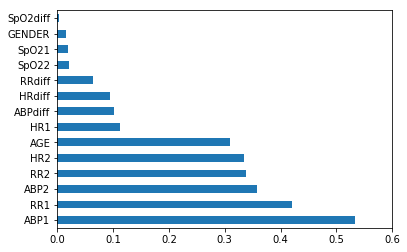

In [11]:
feat_imp = pd.Series(np.std(X_train, 0)*abs(glm.coef_.reshape(14)), index = X_train.columns)
feat_imp.nlargest(14).plot(kind="barh")
plt.xlim(0, 0.6)
plt.show()

In [12]:
acclr, bacclr, auclr, prelr, reclr, f1lr = classification_metrics(y_pred_lr, y_test, y_score_lr)
print(classification_metrics(y_pred_lr, y_test, y_score_lr))

(0.7690721649484537, 0.7551032956222331, 0.8173061157566814, 0.302158273381295, 0.7368421052631579, 0.4285714285714286)


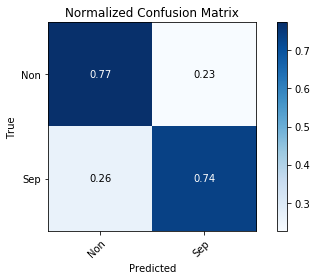

In [13]:
plot_confusion_matrix(y_test, y_pred_lr, ["Non","Sep"])

### Random Forest

In [14]:
rf_para = {'n_estimators':(100, 150, 200, 250), 'max_depth':(1,5,10)}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf = GridSearchCV(rf, rf_para, cv=5, scoring="f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (100, 150, 200, 250), 'max_depth': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [15]:
print(clf.best_params_)
print("Best score: {}".format(clf.best_score_))

{'max_depth': 5, 'n_estimators': 200}
Best score: 0.43525470530926114


In [16]:
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:,1]

In [17]:
accrf, baccrf, aucrf, prerf, recrf, f1rf = classification_metrics(y_pred_rf, y_test, y_score_rf)
print(classification_metrics(y_pred_rf, y_test, y_score_rf))

(0.8391752577319588, 0.6959747499590097, 0.8439088375143465, 0.3670886075949367, 0.5087719298245614, 0.42647058823529416)


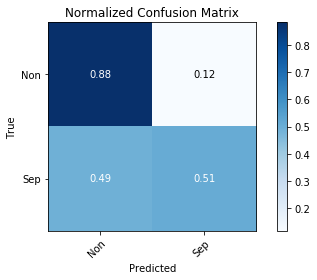

In [18]:
plot_confusion_matrix(y_test, y_pred_rf, ["Non","Sep"])

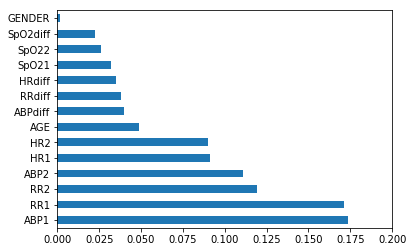

In [19]:
feat_imp = pd.Series(rf.feature_importances_, index = X_train.columns)
feat_imp.nlargest(14).plot(kind="barh")
plt.xlim(0, 0.2)
plt.show()

### SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_para = {'kernel':("linear","rbf","sigmoid"), 'gamma':('auto','scale')}
svm = SVC(class_weight="balanced", probability=True)
clf = GridSearchCV(svm, svm_para, cv=5, scoring="f1")
clf.fit(X_train, y_train)

/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/envs/sepsis/lib/python3.6/site-packages/sklearn/m

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'sigmoid'), 'gamma': ('auto', 'scale')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [22]:
print(clf.best_params_)
print("Best score: {}".format(clf.best_score_))

{'gamma': 'auto', 'kernel': 'linear'}
Best score: 0.387185280938139


In [37]:
svm = SVC(kernel="linear",gamma="auto",class_weight="balanced",probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)[:,1]

In [38]:
accsvm, baccsvm, aucsvm, presvm, recsvm, f1svm = classification_metrics(y_pred_svm, y_test, y_score_svm)
print(classification_metrics(y_pred_svm, y_test, y_score_svm))

(0.7628865979381443, 0.7592023282505329, 0.8196015740285293, 0.2986111111111111, 0.7543859649122807, 0.42786069651741293)


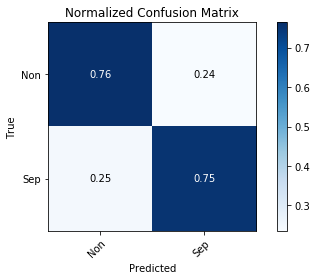

In [39]:
plot_confusion_matrix(y_test, y_pred_svm, ["Non","Sep"])

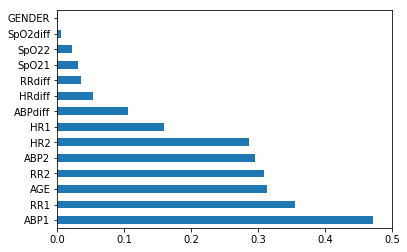

In [40]:
feat_imp = pd.Series(np.std(X_train, 0)*abs(svm.coef_.reshape(14)), index = X_train.columns)
feat_imp.nlargest(14).plot(kind="barh")
plt.xlim(0, 0.5)
plt.show()

# Save Model

In [32]:
from joblib import dump, load

In [33]:
dump(svm, '../model/svm.joblib') 

['../model/svm.joblib']

In [34]:
dump(glm, '../model/glm.joblib') 
dump(rf, '../model/rf.joblib') 

['../model/rf.joblib']